# Machine Learning - Linear Regression Implementation Using Python

In this notebook we'll implement the the linear regression algorithm with one variable.

### Importing required packages/laibraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Getting data ready

The dataset used in the notebook is on Kaggle : https://www.kaggle.com/andonians/random-linear-regression for randomized dataset for linear regression problem.

In [49]:
df = pd.read_csv('data/train.csv')

In [50]:
len(df)

700

In [51]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [52]:
df['x'].head()

0    24.0
1    50.0
2    15.0
3    38.0
4    87.0
Name: x, dtype: float64

In [53]:
df['y'].head()

0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
Name: y, dtype: float64

### Understanding the data

Before going to any rask, It's useful to understand the data by visualize it, For our datasets, The more convinient plot type to use is the scatter plot since we've only to variables.

#### Definig the feauture and the target variables

In [87]:
X_train = df['x']
y_train = df['y']

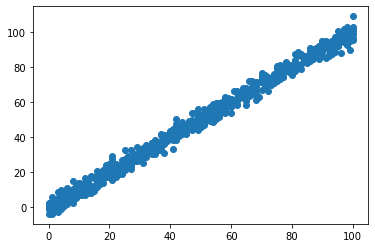

In [88]:
plt.scatter(X_train, y_train)

Let's do some tweak to improve our plot, and create a function to deal with that insead.

In [138]:
def plot_data(X, y):
    """
    Plot the data in a scatter plot. in the given figure with x-label and y-label axis.
    :params
    x: array-like
       data for x-axis
    y: array-like
       data for y-axis
    return NULL
    """
    
    fig = plt.figure(figsize=(12,8))
    plt.plot(X, y, 'bo', ms=3)
    plt.xlabel('x axis label')
    plt.ylabel('y axis label')
    plt.show()

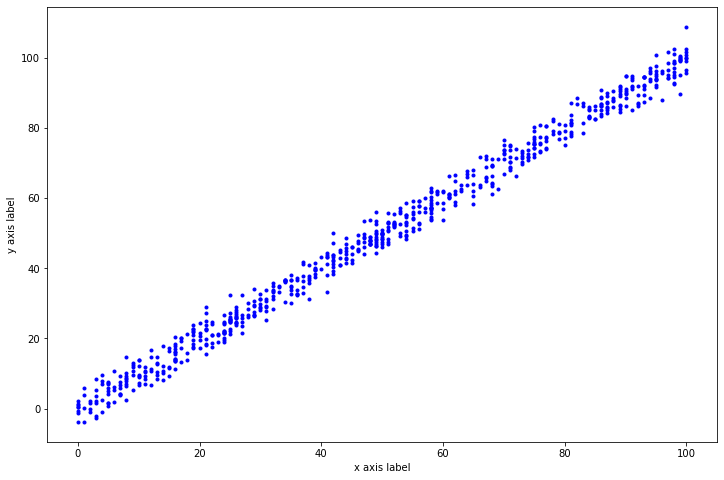

In [139]:
plot_data(X_train, y_train)

In [141]:
?plt.plot

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

Our hypothesis function for the problem is:  $h_{\theta}(x)=\theta_{0}+\theta_{1} x_{1}$

To best fit the our linear regression parameters $\theta_{0}$ and $\theta_{0}$ we need to implement the **Gradient Descent** algorithm.

To do that we need to minimize our cost function :   $J(\theta)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$

In a linear fashion the hypothesis function is given by : $h_{\theta}(x)=\theta^{T} x=\theta_{0}+\theta_{1} x_{1}$

The parameters of our model are $\theta_{j}$ values, And this values that we've to adjust to minimize the cost function discussed above... To do so we need the gradient descent algorithm.

But before implementing the Gradient Descent algorithm, we need to monitor the convergence of the alogrithm by computing the cost function at each iteration of the gradient descent algorithm.

#### Cost function implementation  $J(\theta)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$

In [146]:
def cost_function(X, y, theta):
    """
    Compute the cost function.
    """
    # number of training samples
    return (1/2 * m) * np.sum(np.square(np.dot(X, theta) - y)) 